# 428_ra236.530_dec-46.922_4U1543

In [1]:
from pathlib import Path
import numpy as np
import arviz as az
import graphviz as gv
import utility_functions as ufn
import importlib

importlib.reload(ufn)
az.style.use("arviz-white")

RANDOM_SEED = 2023-10-10
rng = np.random.default_rng(RANDOM_SEED)

OVERWRITE_TRACES = False

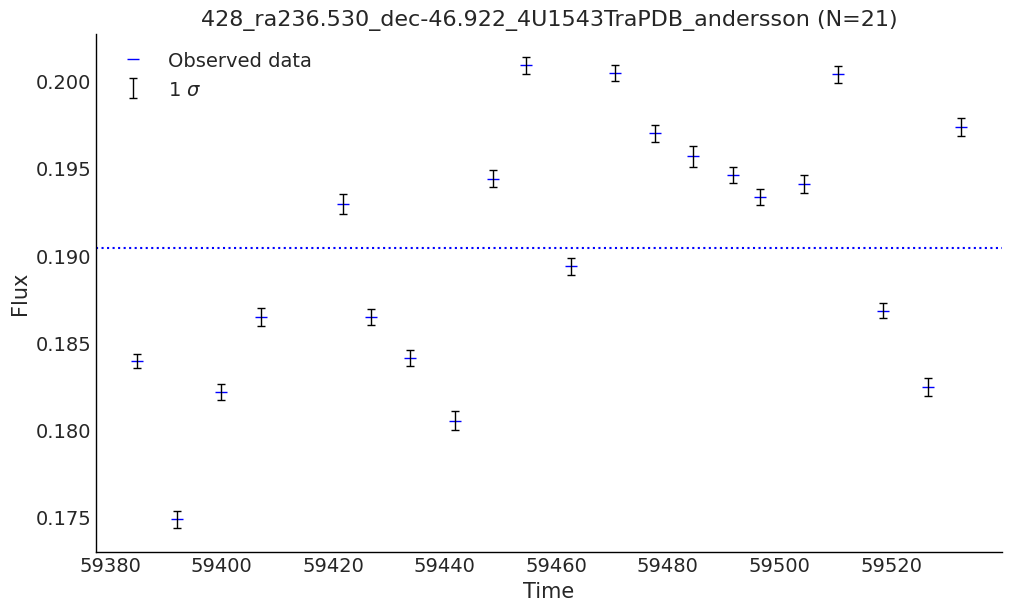

In [2]:
# File paths to CSVs of flux density observations.
csv_paths_list = sorted(list(Path('data_raw').iterdir()))
csv_path = csv_paths_list[1]
ufn.plot_lc(csv_path)

## SE Kernel only, Zero Mean Function

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta \exp\left\{ - \frac{1}{2\ell^2}\tau^2\right\}$$

$$\ell \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

Sampling: [ell_SE, eta_SE, sig, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta_SE, ell_SE, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 31 seconds.
Sampling: [f_star]


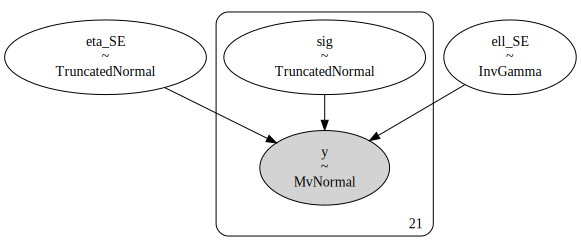

In [3]:
se0_trace_path = Path(f"traces/{csv_path.stem}_se0_idata.nc")
se0_dag_path = Path(f'dags/{csv_path.stem}_se0_dag.dot')

if se0_trace_path.is_file() and not OVERWRITE_TRACES:
    se0_trace = az.from_netcdf(se0_trace_path)
    se0_dag = gv.Source.from_file(se0_dag_path)
else:
    se0_trace, se0_dag = ufn.fit_se_gp(csv_path)
    az.to_netcdf(se0_trace, se0_trace_path)
    with open(se0_dag_path, 'w') as writehandle:
        writehandle.write(se0_dag.source)

gv.Source(se0_dag.source)

In [6]:
variable_names = ["ell_SE", "eta_SE"]
ufn.print_post_summary(se0_trace_path, variable_names)

median       mad    eti_16%    eti_84%  mcse_median   ess_median  \
ell_SE  12.407761  0.429280  11.757371  13.048278     0.012606  5482.235317   
eta_SE   0.022146  0.006023   0.014968   0.034568     0.000164  6519.340174   

           ess_tail     r_hat       mean        sd  
ell_SE  3509.073879  0.999358  12.389804  0.669965  
eta_SE  3457.937015  1.000103   0.025129  0.012403

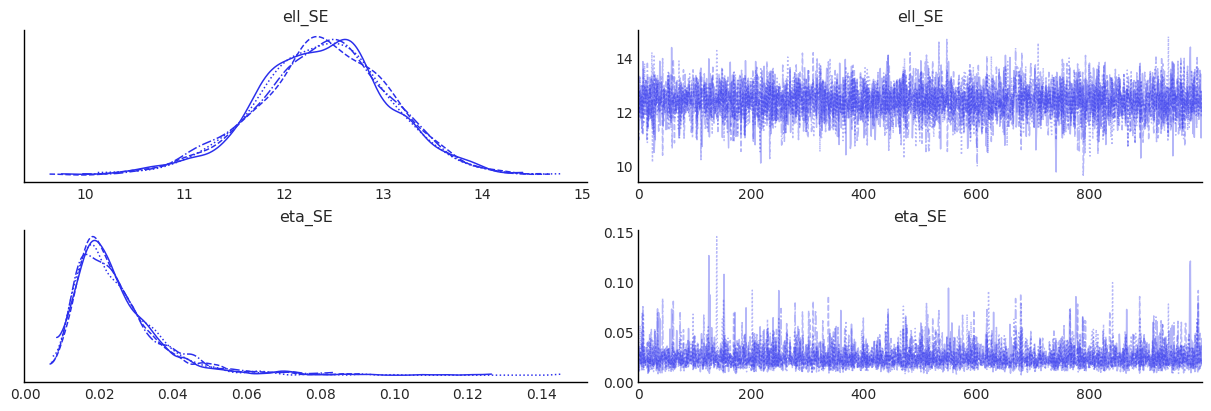

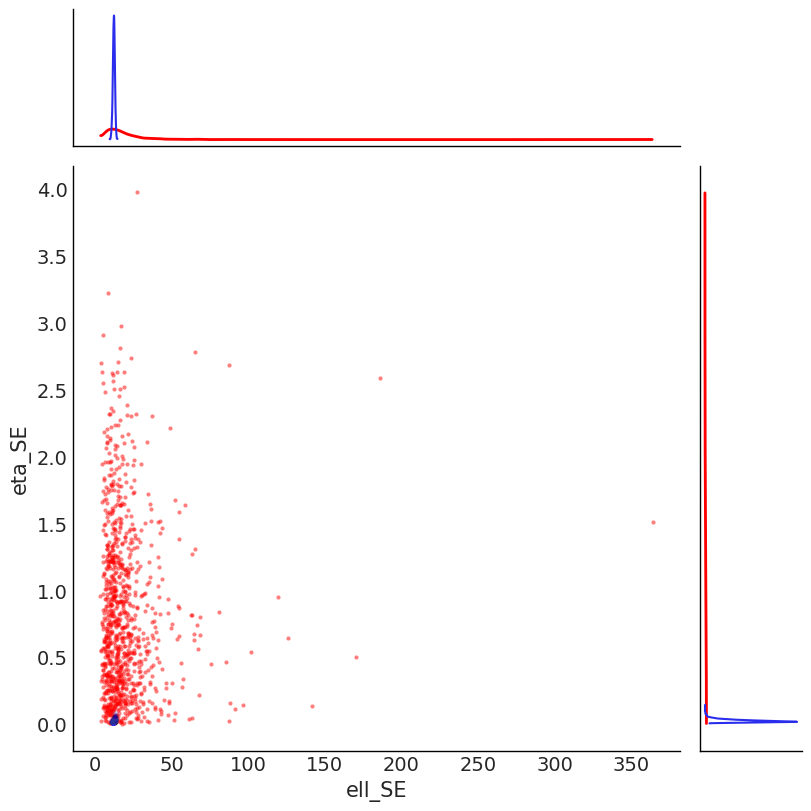

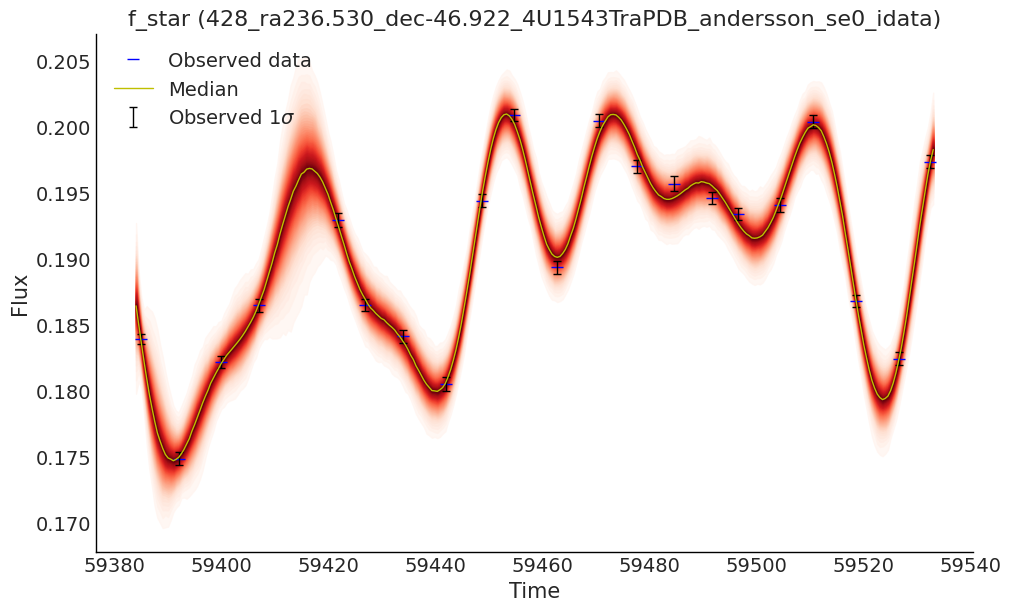

In [7]:
ufn.plot_traces(se0_trace_path, variable_names)
ufn.plot_priorpost_cnr(se0_trace_path, variable_names)
ufn.plot_postpred_samples(se0_trace_path, csv_path)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


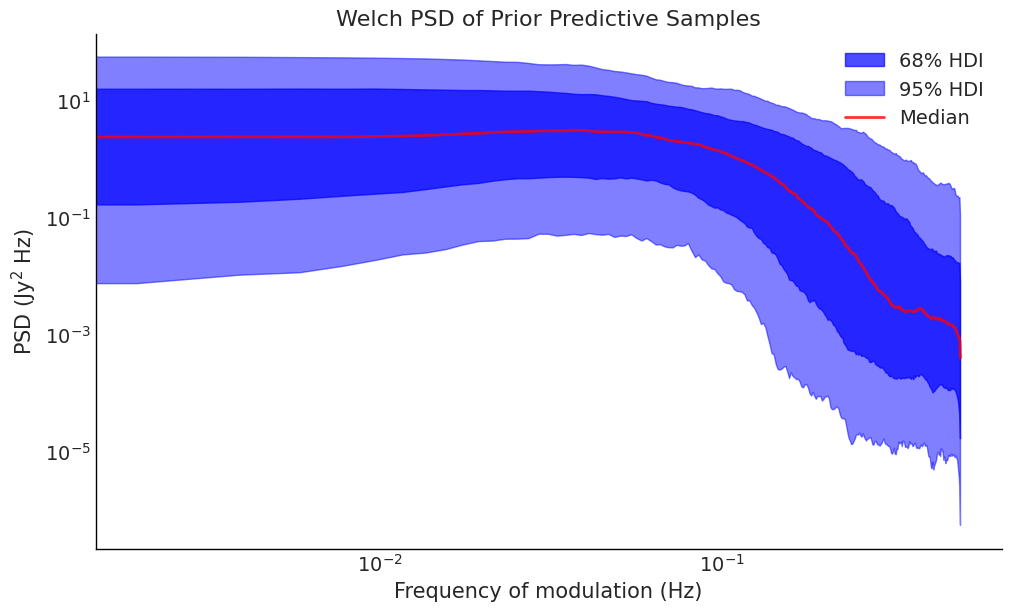

In [8]:
ufn.plot_priorpred_PSD(se0_trace_path)

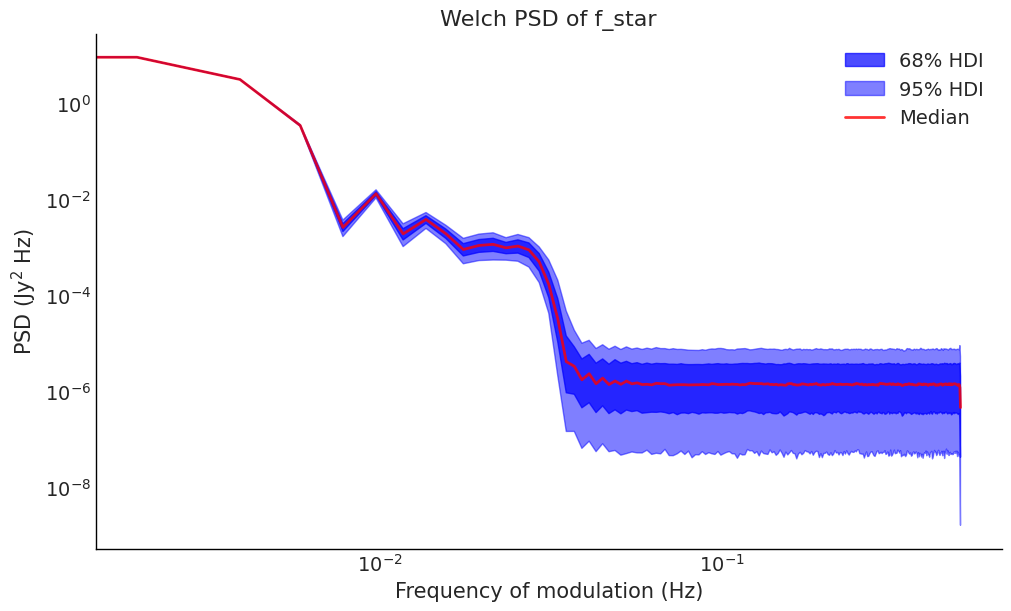

In [9]:
ufn.plot_welch_psd(se0_trace);

## Matern $\frac{3}{2}$ Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{M}(\tau) =  \eta_\textrm{M}^2\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

Sampling: [ell_M32, eta_M32, sig_M32, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta_M32, ell_M32, sig_M32]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 53 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
Sampling: [f_star]


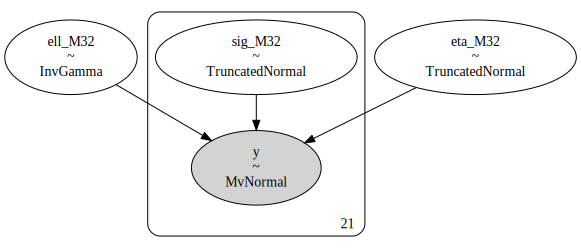

In [10]:
m32_trace_path = Path(f"traces/{csv_path.stem}_m32_idata.nc")
m32_dag_path = Path(f'dags/{csv_path.stem}_m32_dag.dot')

if m32_trace_path.is_file() and not OVERWRITE_TRACES:
    m32_trace = az.from_netcdf(m32_trace_path)
    m32_dag = gv.Source.from_file(m32_dag_path)
else:
    m32_trace, m32_dag = ufn.fit_m32_gp(csv_path, rng_seed=rng);
    az.to_netcdf(m32_trace, m32_trace_path)
    with open(m32_dag_path, 'w') as writehandle:
        writehandle.write(m32_dag.source)

gv.Source(m32_dag.source)

In [11]:
variable_names = ["ell_M32", "eta_M32"]
ufn.print_post_summary(m32_trace_path, variable_names)

median        mad    eti_16%     eti_84%  mcse_median  \
ell_M32  107.851069  27.449885  76.936534  169.277190     1.122146   
eta_M32    0.049409   0.030435   0.019489    0.178813     0.001233   

          ess_median     ess_tail     r_hat        mean         sd  
ell_M32  3395.581245  2478.281354  1.000777  122.751419  54.918587  
eta_M32  3362.667710  2584.834689  1.000647    0.117577   0.200613

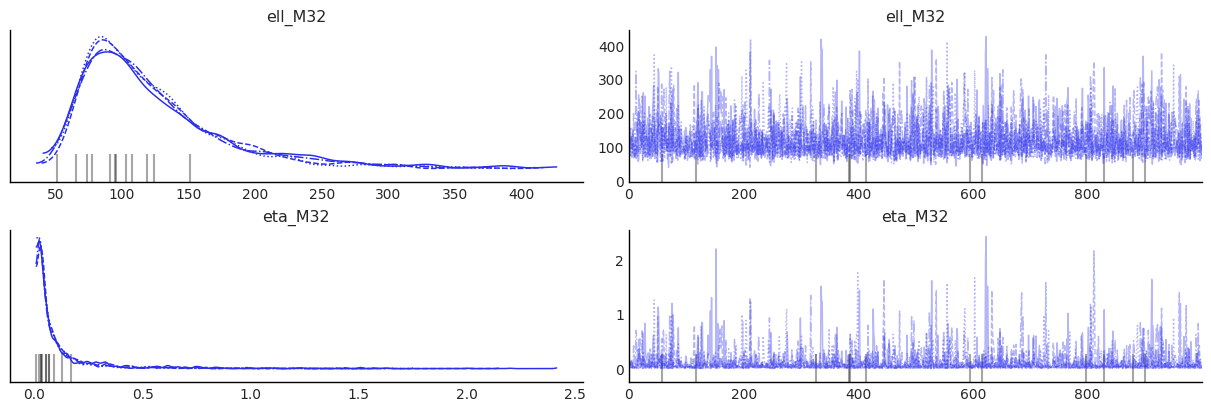

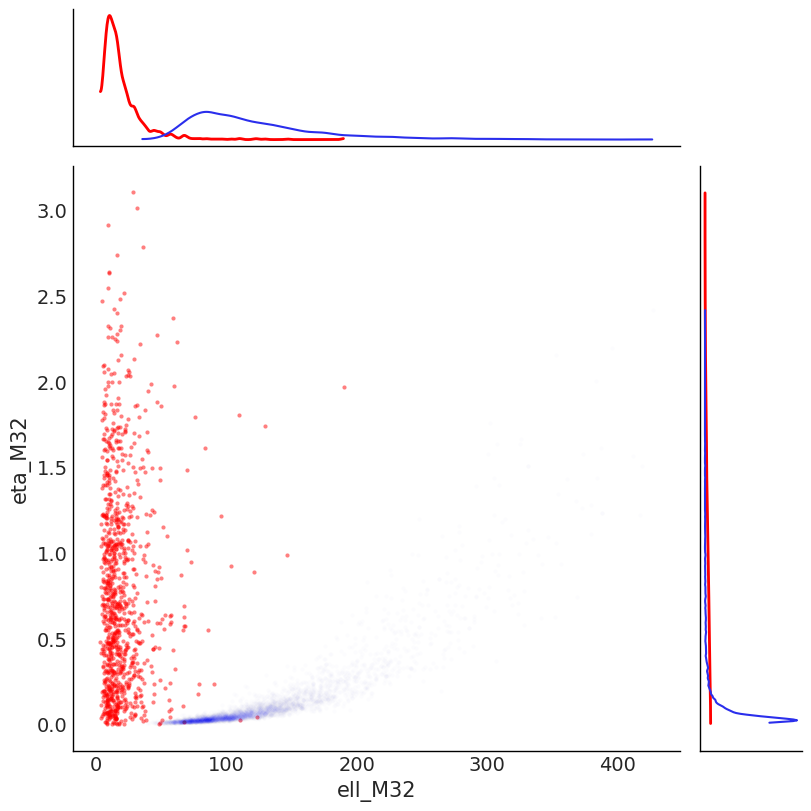

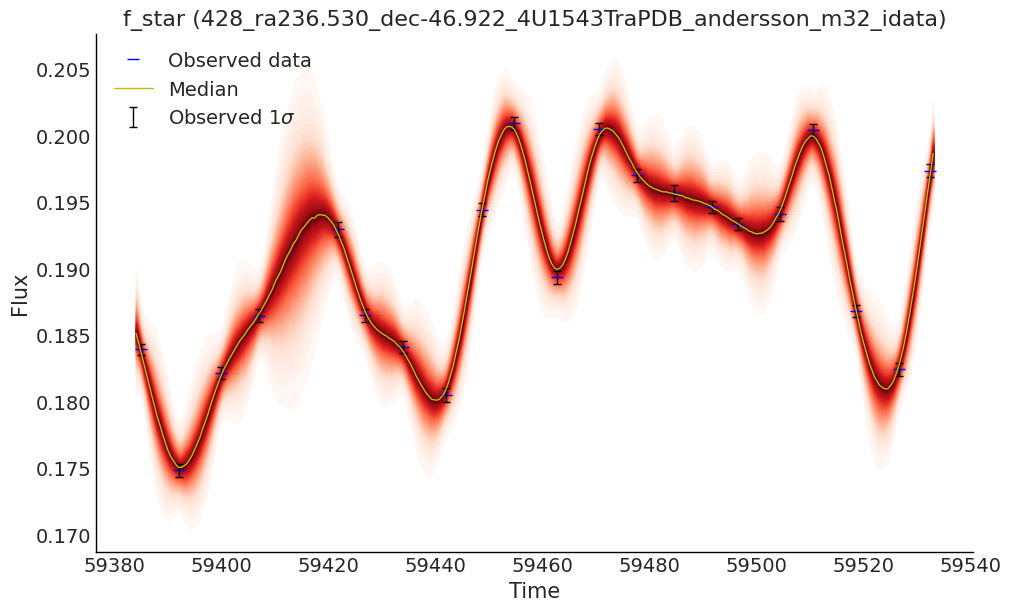

In [12]:
ufn.plot_traces(m32_trace_path, variable_names)
ufn.plot_priorpost_cnr(m32_trace_path, variable_names)
ufn.plot_postpred_samples(m32_trace_path, csv_path)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


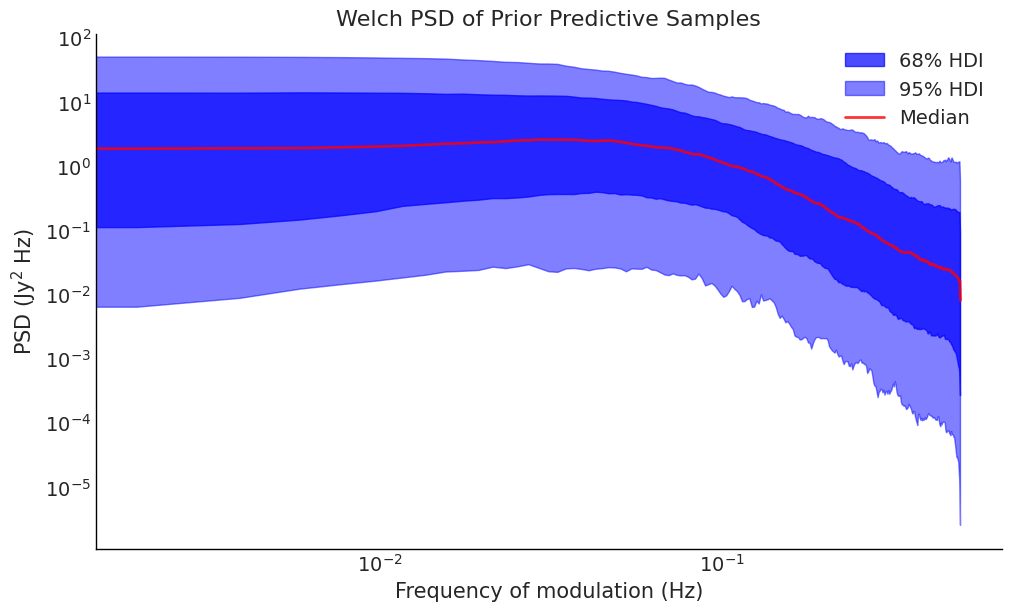

In [13]:
ufn.plot_priorpred_PSD(m32_trace_path)

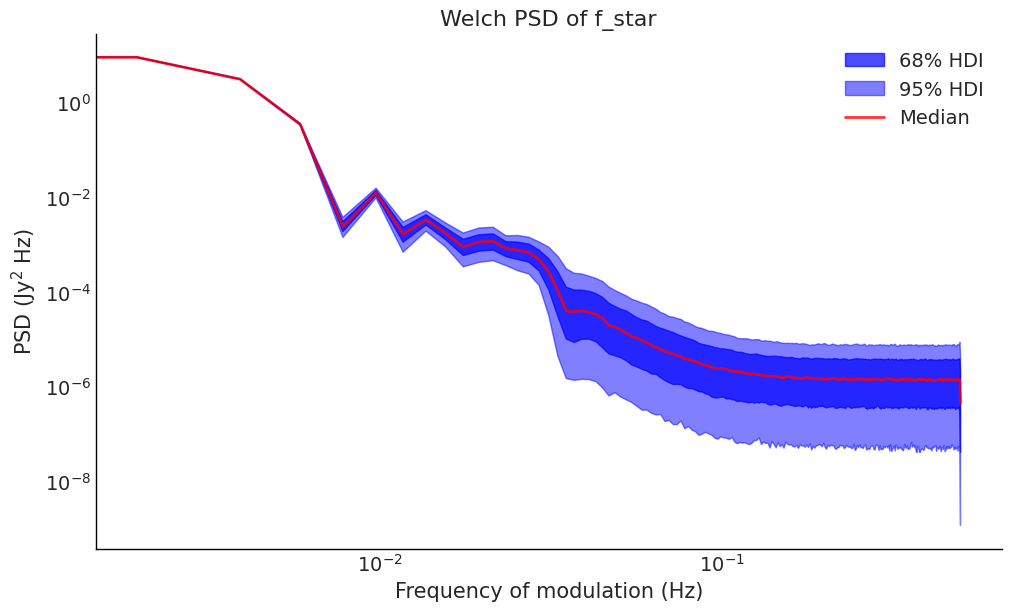

In [14]:
ufn.plot_welch_psd(m32_trace);

## SE + Matern $\frac{3}{2}$ additive kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta \left[ \exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} + \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\} \right]$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

Sampling: [ell_M32, ell_SE, eta, sig, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta, ell_SE, ell_M32, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 50 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
Sampling: [f_star]


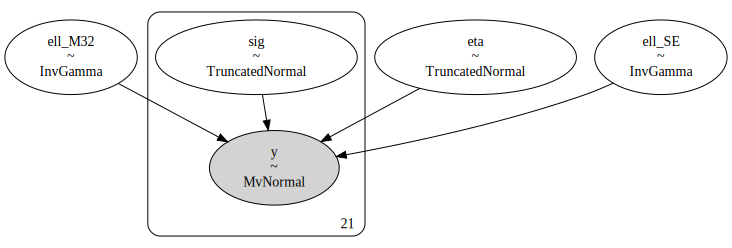

In [15]:
se_m32_trace_path = Path(f"traces/{csv_path.stem}_se+m32_idata.nc")
se_m32_dag_path = Path(f'dags/{csv_path.stem}_se+m32_dag.dot')

if se_m32_trace_path.is_file() and not OVERWRITE_TRACES:
    se_m32_trace = az.from_netcdf(se_m32_trace_path)
    se_m32_dag = gv.Source.from_file(se_m32_dag_path)
else:
    se_m32_trace, se_m32_dag = ufn.fit_se_m32_gp(csv_path, multiplicative_kernel=False, rng_seed=rng);
    az.to_netcdf(se_m32_trace, se_m32_trace_path)
    with open(se_m32_dag_path, 'w') as writehandle:
        writehandle.write(se_m32_dag.source)

gv.Source(se_m32_dag.source)

In [16]:
variable_names = ["ell_SE", "ell_M32", "eta"]
ufn.print_post_summary(se_m32_trace_path, variable_names)

median        mad    eti_16%     eti_84%  mcse_median  \
ell_SE   68.150716  22.883622  41.799646  124.189216     0.737682   
ell_M32  69.296335  15.027917  51.550691   98.153234     0.478696   
eta       0.014885   0.007399   0.007186    0.037505     0.000327   

          ess_median     ess_tail     r_hat       mean         sd  
ell_SE   3172.644246  2245.617381  0.999816  86.778611  75.811526  
ell_M32  3388.486020  2092.458943  1.000276  75.867873  29.728943  
eta      3262.795812  2026.468438  1.000833   0.027899   0.054849

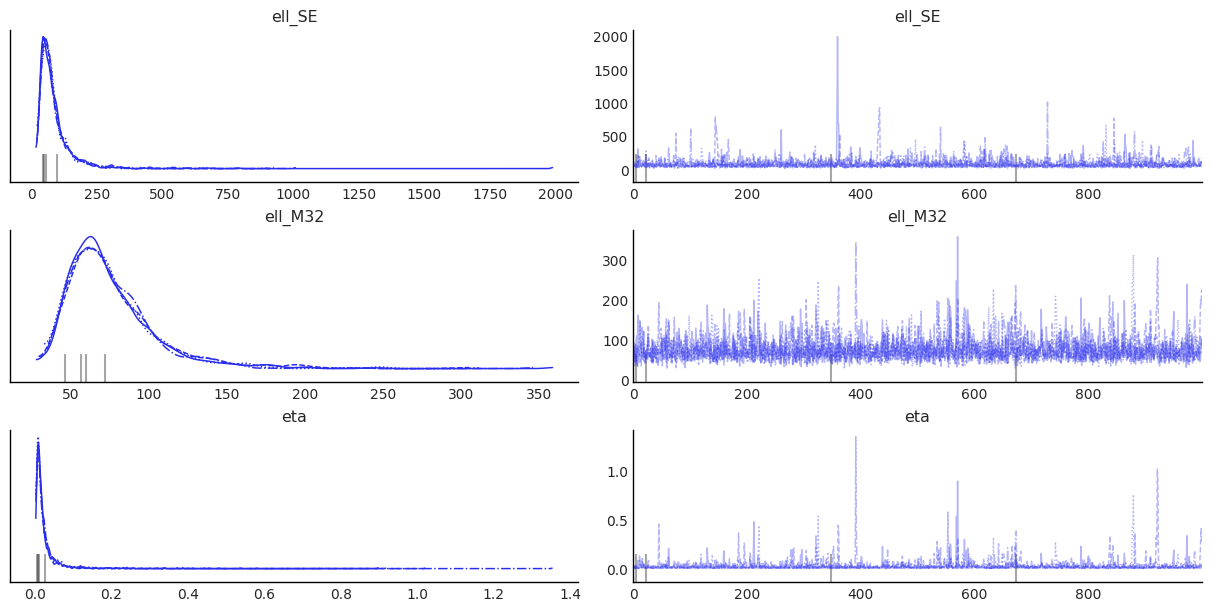

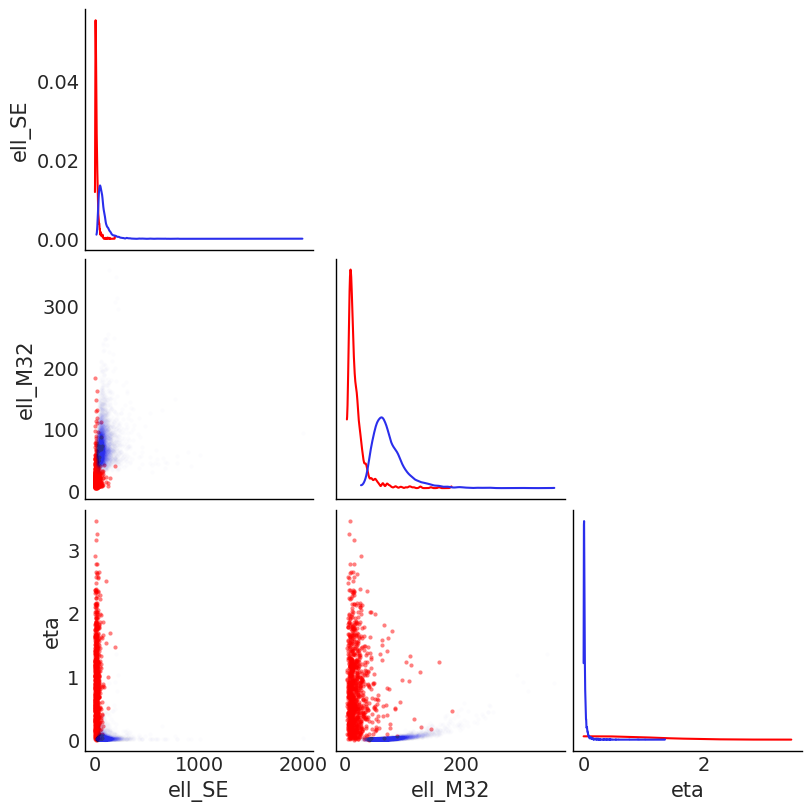

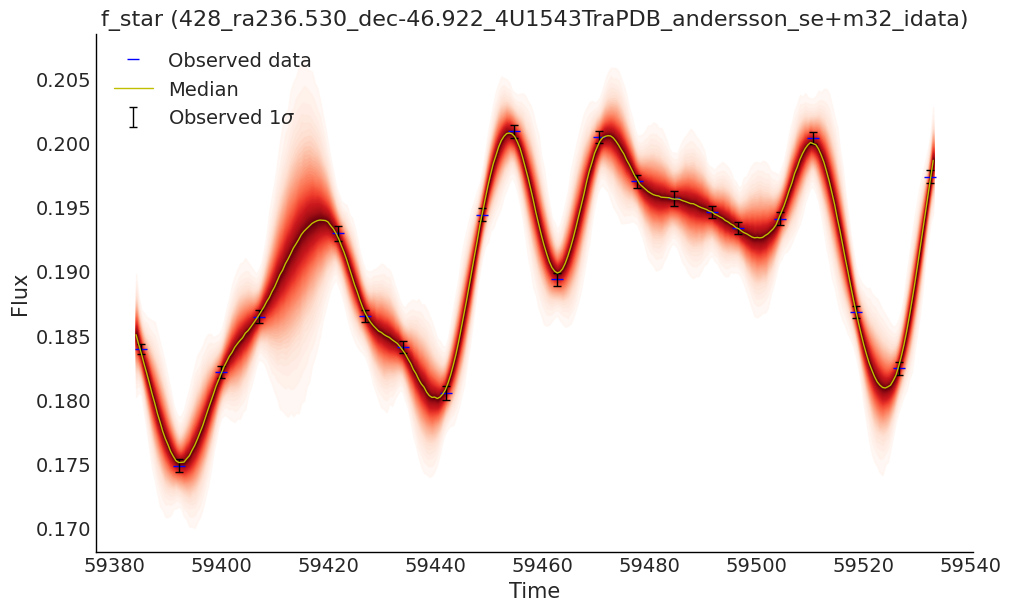

In [17]:
ufn.plot_traces(se_m32_trace_path, variable_names)
ufn.plot_priorpost_cnr(se_m32_trace_path, variable_names)
ufn.plot_postpred_samples(se_m32_trace_path, csv_path)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


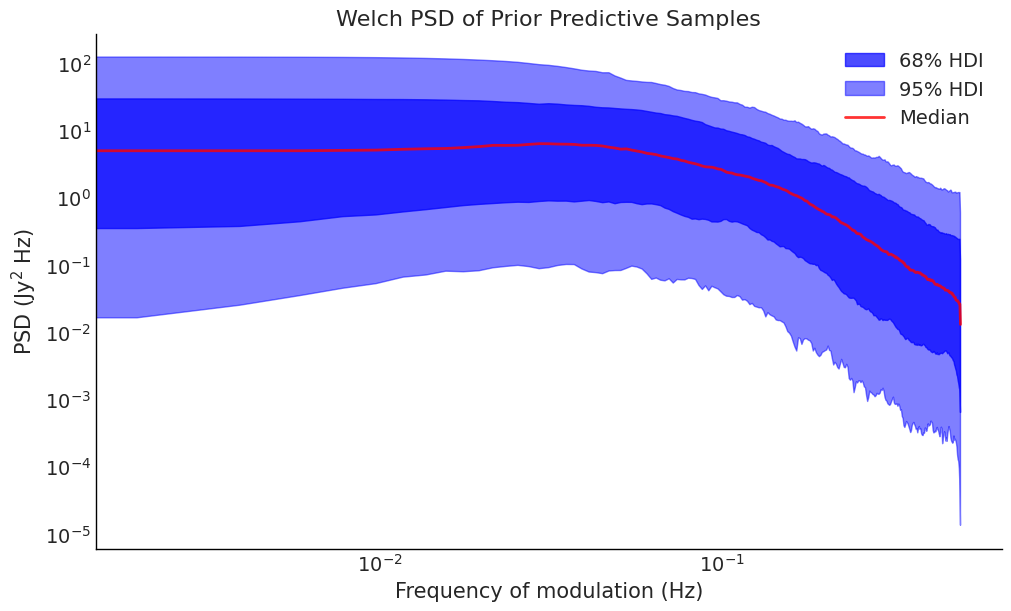

In [18]:
ufn.plot_priorpred_PSD(se_m32_trace_path)

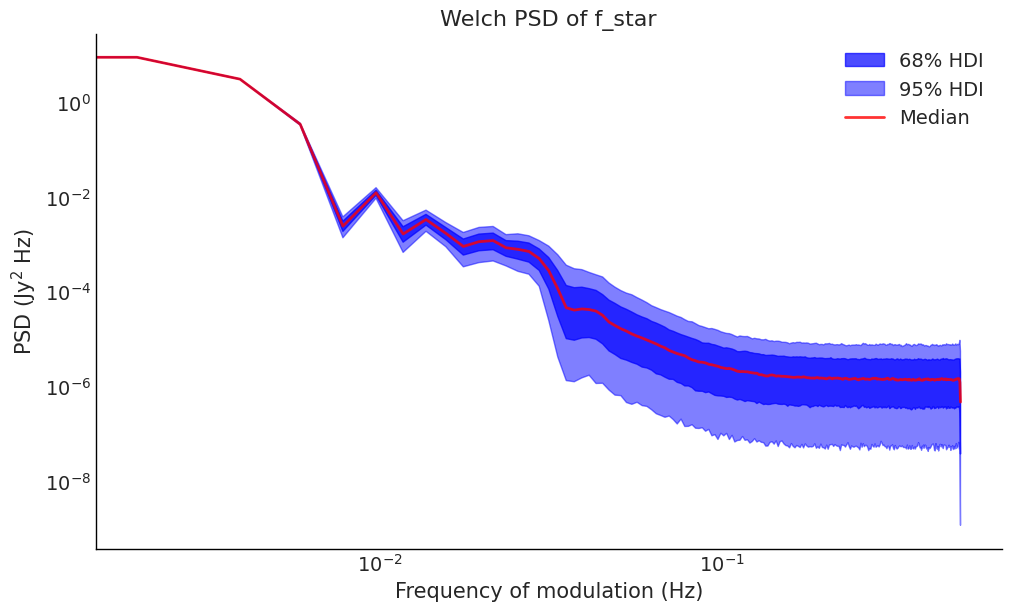

In [19]:
ufn.plot_welch_psd(se_m32_trace);

## SE $\times$ Matern $\frac{3}{2}$ Multiplicative Kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta \times \exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} \times \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

Sampling: [ell_M32, ell_SE, eta, sig, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta, ell_SE, ell_M32, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 72 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
Sampling: [f_star]


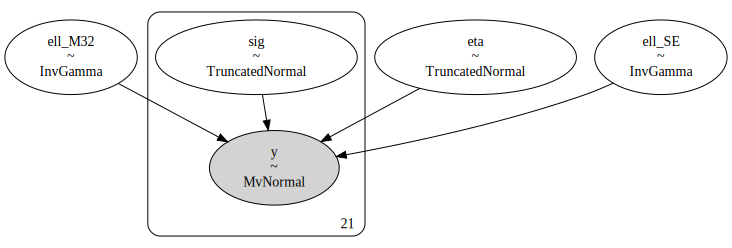

In [20]:
sexm32_trace_path = Path(f"traces/{csv_path.stem}_sexm32_idata.nc")
sexm32_dag_path = Path(f'dags/{csv_path.stem}_sexm32_dag.dot')

if sexm32_trace_path.is_file() and not OVERWRITE_TRACES:
    sexm32_trace = az.from_netcdf(sexm32_trace_path)
    sexm32_dag = gv.Source.from_file(sexm32_dag_path)
else:
    sexm32_trace, sexm32_dag = ufn.fit_se_m32_gp(csv_path, multiplicative_kernel=True, rng_seed=rng);
    az.to_netcdf(sexm32_trace, sexm32_trace_path)
    with open(sexm32_dag_path, 'w') as writehandle:
        writehandle.write(sexm32_dag.source)

gv.Source(sexm32_dag.source)

In [21]:
variable_names = ["ell_SE", "ell_M32", "eta"]
ufn.print_post_summary(sexm32_trace_path, variable_names)

median        mad    eti_16%     eti_84%  mcse_median  \
ell_SE   87.649214  29.701808  54.031671  155.782222     1.135838   
ell_M32  94.950673  19.473610  71.667457  135.968651     0.603047   
eta       0.036135   0.017870   0.017759    0.094210     0.000556   

          ess_median     ess_tail     r_hat        mean          sd  
ell_SE   3665.780580  2310.456590  1.000357  111.276347  101.352977  
ell_M32  3140.991639  1926.933967  1.000420  104.104055   38.855611  
eta      3265.310532  2054.201813  1.000963    0.066225    0.105059

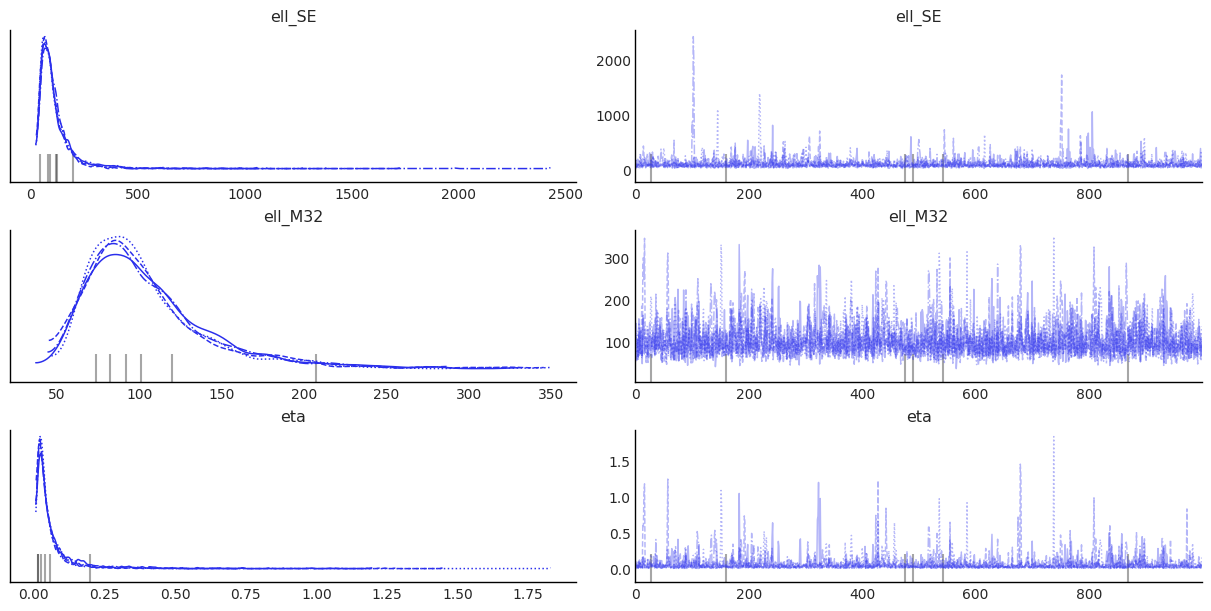

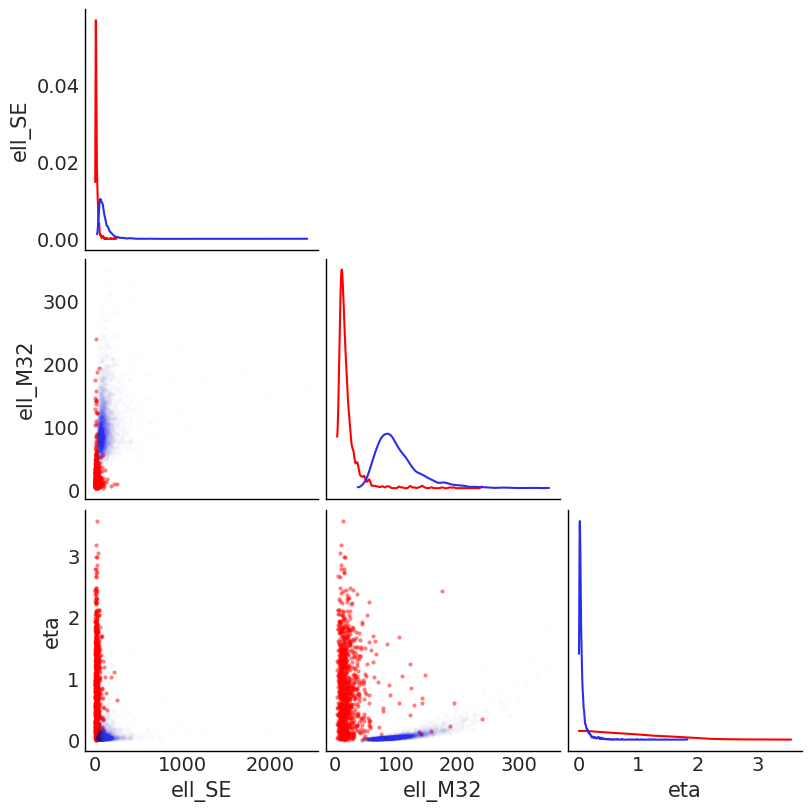

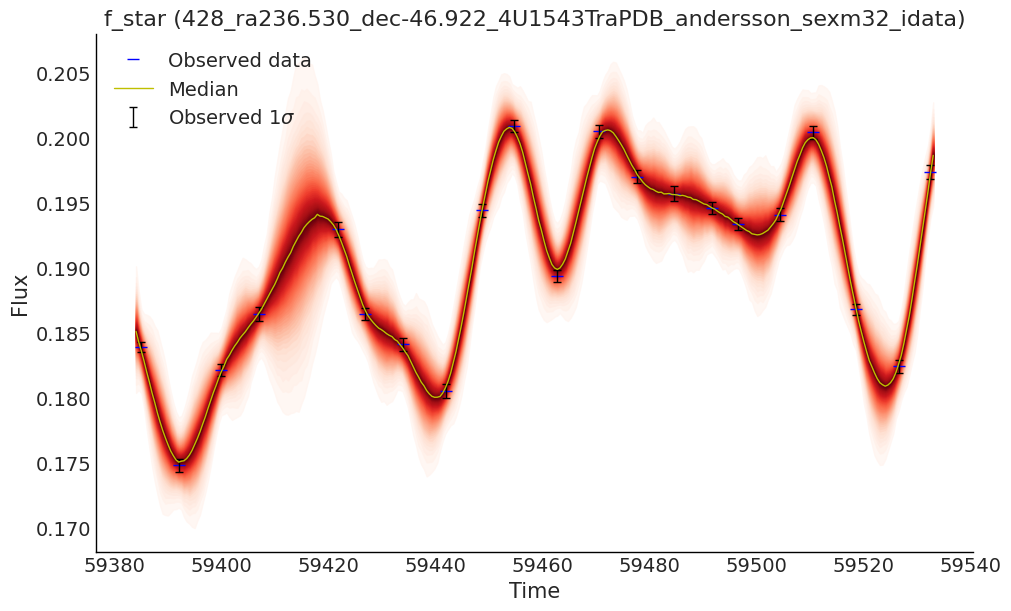

In [22]:
ufn.plot_traces(sexm32_trace_path, variable_names)
ufn.plot_priorpost_cnr(sexm32_trace_path, variable_names)
ufn.plot_postpred_samples(sexm32_trace_path, csv_path)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


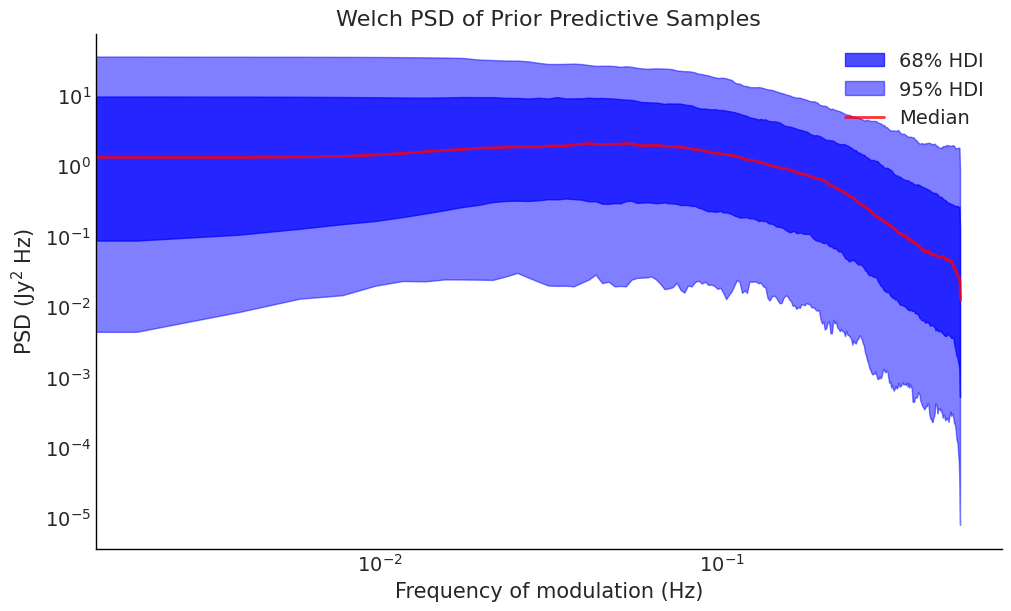

In [23]:
ufn.plot_priorpred_PSD(sexm32_trace_path)

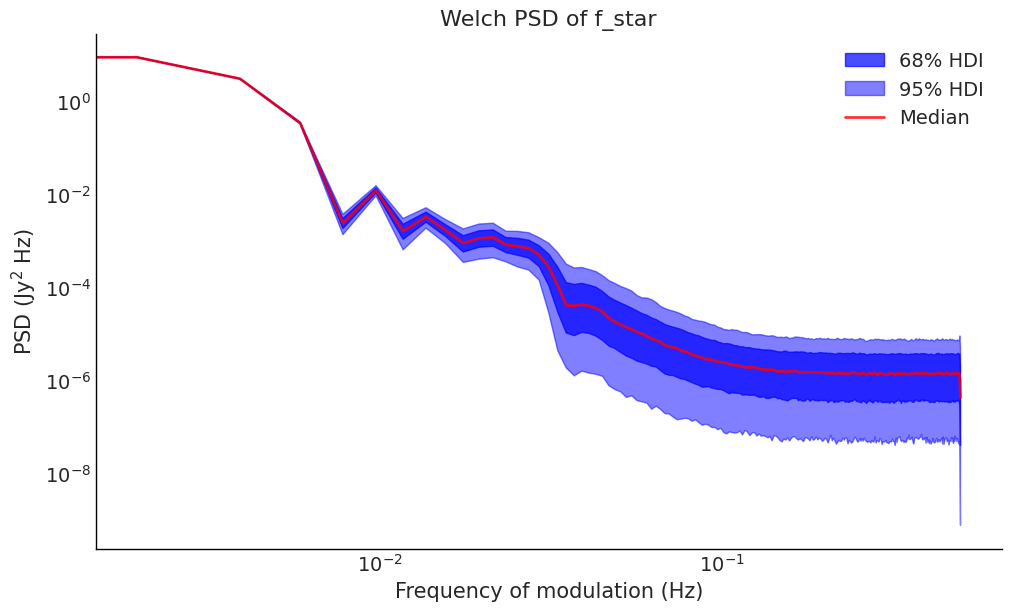

In [24]:
ufn.plot_welch_psd(sexm32_trace);

## SE GP + Matern $\frac{3}{2}$ GP

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{GP}(\boldsymbol{0}, k_\textrm{SE}(\tau)) + \mathcal{GP}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}, \quad k_\textrm{M}(\tau) = \eta_\textrm{M}\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta_\textrm{SE} \sim \mathcal{N}^+(0, 1)$$

$$\eta_\textrm{M} \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN},i} \sim \mathcal{N}^+(\textrm{std err}(y_i), \textrm{SD}(\textrm{std err}(\boldsymbol{y})))$$

Sampling: [ell_M32, ell_SE, eta_M32, eta_SE, f, sig]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta_SE, eta_M32, ell_SE, ell_M32, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 96 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 350 divergences after tuning. Increase `target_accept` or reparameterize.
Sampling: [f_star, f_star_M32, f_star_SE]


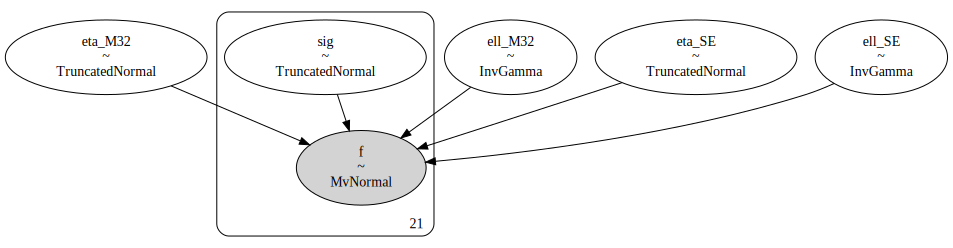

In [25]:
gpSE_gpM32_trace_path = Path(f"traces/{csv_path.stem}_gpSE_gpM32_idata.nc")
gpSE_gpM32_dag_path = Path(f'dags/{csv_path.stem}_gpSE_gpM32_dag.dot')

if gpSE_gpM32_trace_path.is_file() and not OVERWRITE_TRACES:
    gpSE_gpM32_trace = az.from_netcdf(gpSE_gpM32_trace_path)
    gpSE_gpM32_dag = gv.Source.from_file(gpSE_gpM32_dag_path)
else:
    gpSE_gpM32_trace, gpSE_gpM32_dag = ufn.fit_gpSE_gpM32(csv_path, rng_seed=rng);
    az.to_netcdf(gpSE_gpM32_trace, gpSE_gpM32_trace_path)
    with open(gpSE_gpM32_dag_path, 'w') as writehandle:
        writehandle.write(gpSE_gpM32_dag.source)

gv.Source(gpSE_gpM32_dag.source)

In [26]:
variable_names = ["ell_SE", "ell_M32", "eta_SE", "eta_M32"]
ufn.print_post_summary(gpSE_gpM32_trace_path, variable_names)

median         mad     eti_16%     eti_84%  mcse_median  \
ell_SE   217.607801  101.647090  104.615660  459.869927     6.042626   
ell_M32   10.718279    3.686833    6.825946   24.585266     0.223260   
eta_SE     0.075744    0.056847    0.020505    0.337637     0.003412   
eta_M32    0.000121    0.000068    0.000056    0.000762     0.000006   

          ess_median    ess_tail     r_hat        mean          sd  
ell_SE   1108.792870  113.543216  1.007715  307.612267  362.382780  
ell_M32   961.239951  116.515089  1.010430   20.757921   33.876148  
eta_SE   1760.829729   84.993301  1.017680    0.187954    0.285940  
eta_M32   859.761450  129.272372  1.009741    0.010901    0.074372

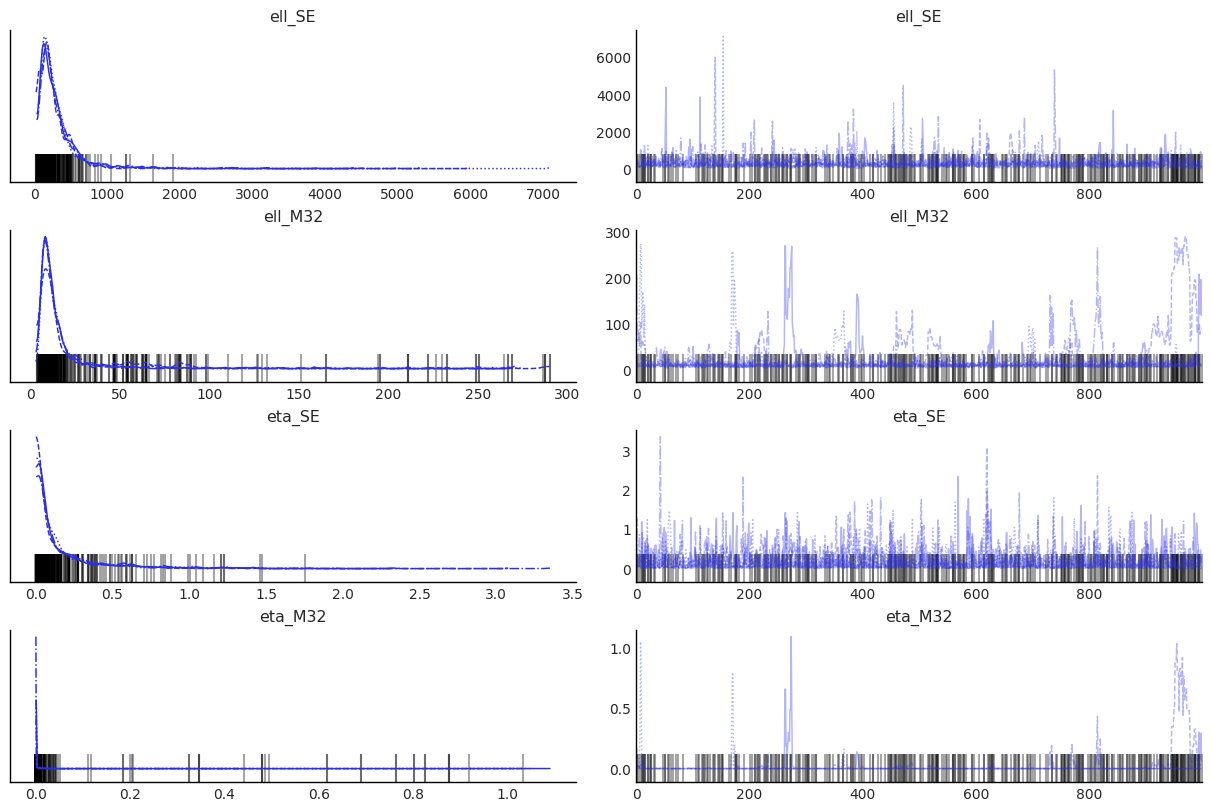

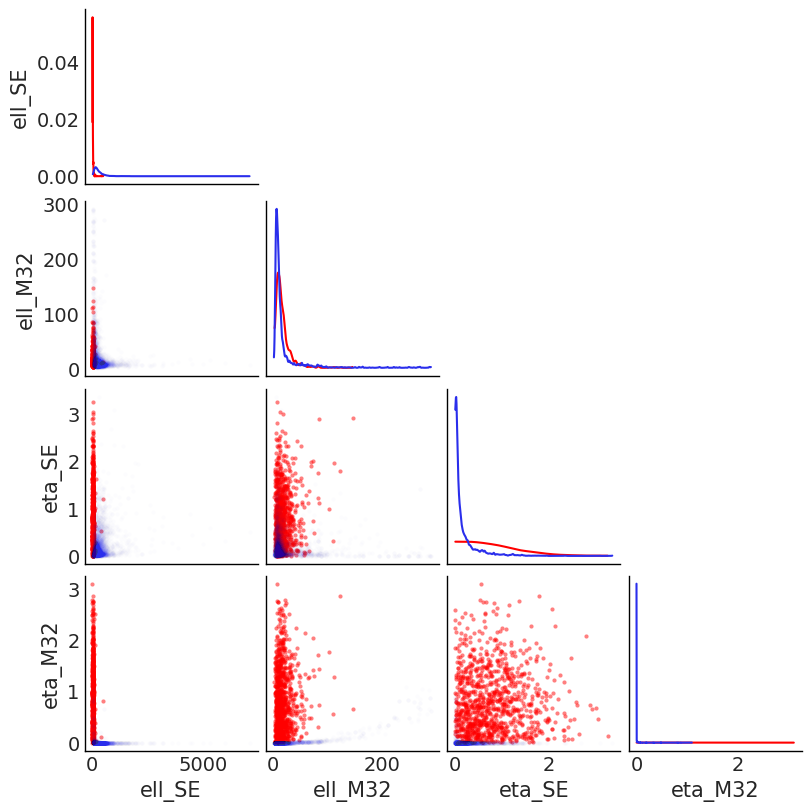

In [27]:
ufn.plot_traces(gpSE_gpM32_trace_path, variable_names)
ufn.plot_priorpost_cnr(gpSE_gpM32_trace_path, variable_names)

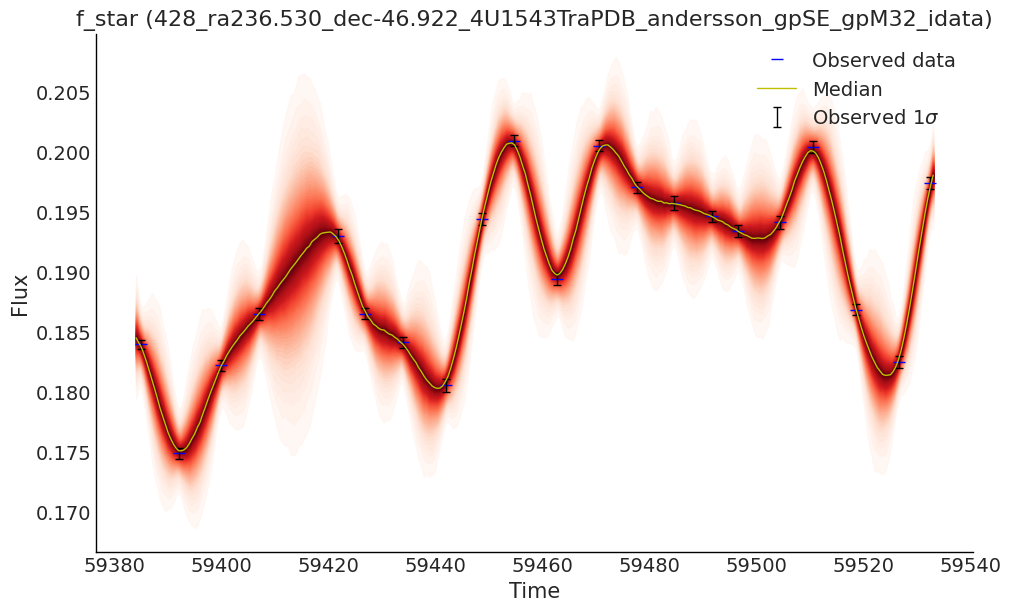

In [28]:
ufn.plot_postpred_samples(gpSE_gpM32_trace_path, csv_path, "f_star")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


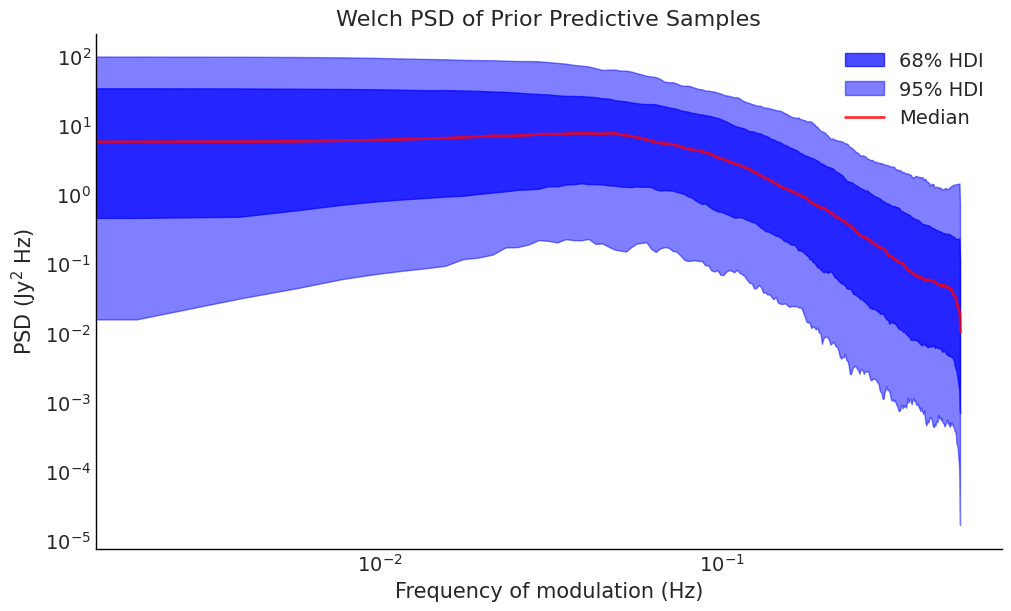

In [29]:
ufn.plot_priorpred_PSD(gpSE_gpM32_trace_path, variable_name="f")

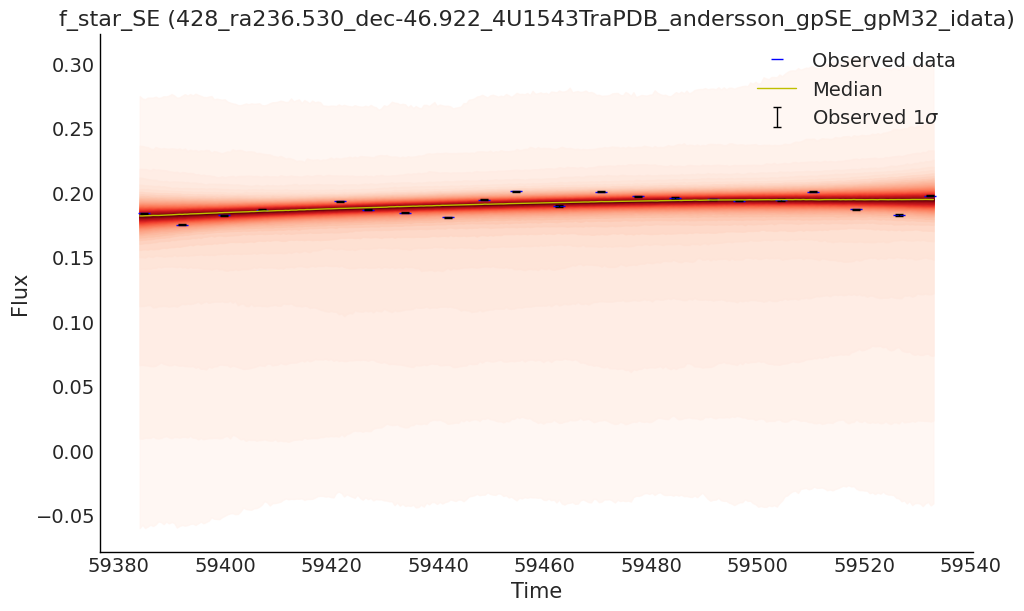

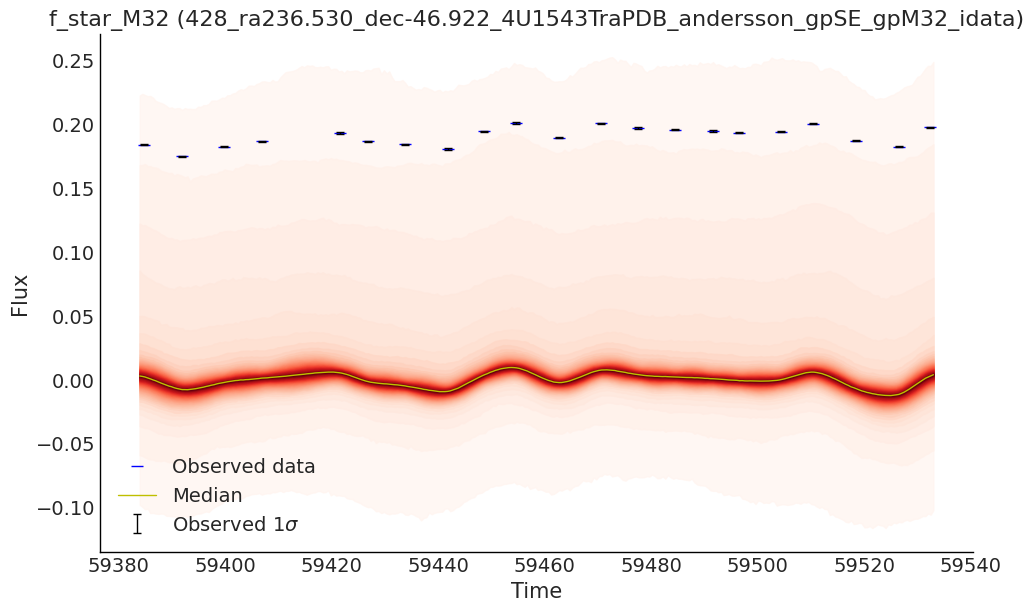

In [30]:
ufn.plot_postpred_samples(gpSE_gpM32_trace_path, csv_path, "f_star_SE")
ufn.plot_postpred_samples(gpSE_gpM32_trace_path, csv_path, "f_star_M32")

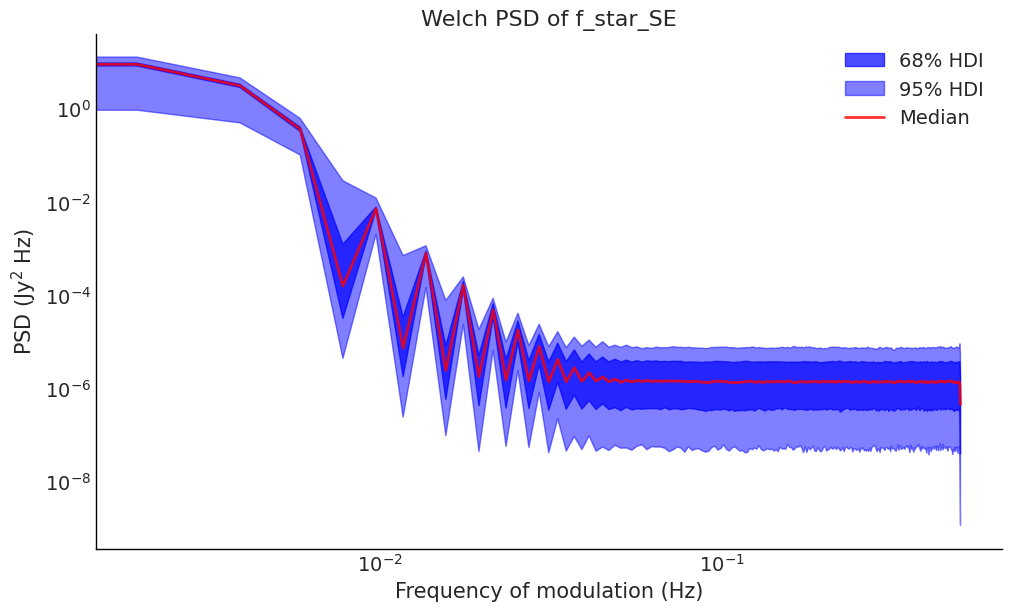

In [31]:
ufn.plot_welch_psd(gpSE_gpM32_trace, "f_star_SE");

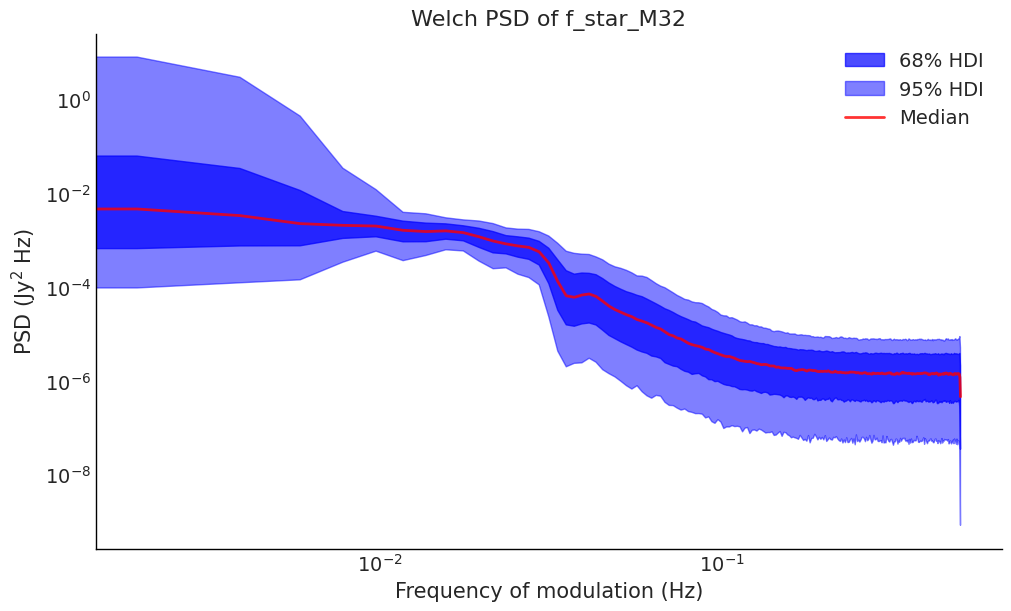

In [32]:
ufn.plot_welch_psd(gpSE_gpM32_trace, "f_star_M32");

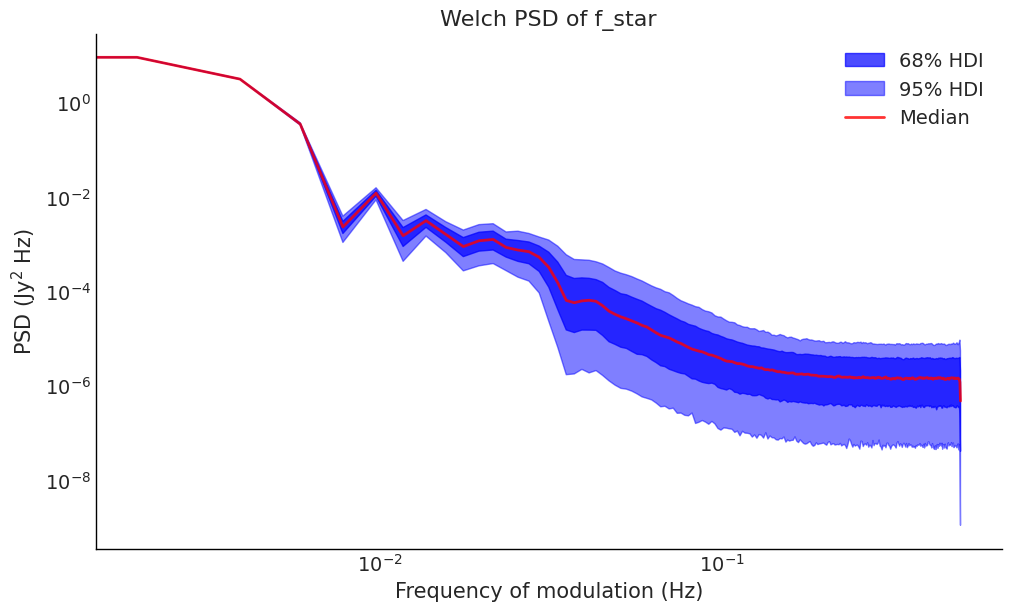

In [33]:
ufn.plot_welch_psd(gpSE_gpM32_trace, "f_star");